In [64]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform


In [65]:
# Load dataset and Normalize data
digits = load_digits()
X = StandardScaler().fit_transform(digits.data[:300])
n, d = X.shape

In [66]:
def compute_joint_probabilities(X, sigma=1.0):
    D = squareform(pdist(X, 'euclidean'))
    P = np.exp(-D**2 / (2 * sigma**2))
    np.fill_diagonal(P, 0)
    P = P / np.sum(P)
    P = (P + P.T) / (2 * n)
    return P

In [67]:
P = compute_joint_probabilities(X, sigma=5)
print("Matrix Probabilities P dijumlahkan: ", np.sum(P))

Matrix Probabilities P dijumlahkan:  0.0033333333333333335


### HITUNG PROBABILITAS DI RUANG TERGET(2D/3D)

In [68]:
np.random.seed(42)
Y = np.random.randn(n, 2)*1e-4

def compute_low_dim_affinities(Y):
    sum_Y = np.sum(np.square(Y), axis=1)
    D = -2 * np.dot(Y, Y.T) + sum_Y[:,None] + sum_Y[None,:]
    Q = 1 / (1 + D)
    np.fill_diagonal(Q, 0)
    Q = Q / np.sum(Q)
    return Q
Q = compute_low_dim_affinities(Y)
print("Matrix Probabilities Q dijumlahkan: ", np.sum(Q))

Matrix Probabilities Q dijumlahkan:  1.0000000000000002


### OPTIMASI(MINIMASI DIVERGENCE)

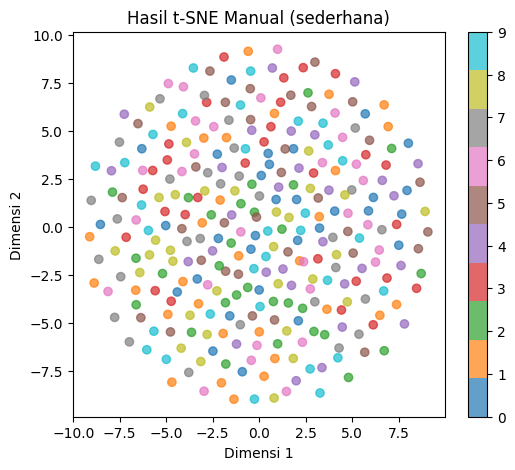

In [69]:
def compute_gradient(P, Q, Y):
    pq_diff = P - Q
    n = P.shape[0]
    grad = np.zeros_like(Y)

    for i in range(n):
        diff = Y[i] - Y
        mult = pq_diff[i, :, None] * (1 + np.sum((Y[i] - Y)**2, axis=1))[:, None]** -1
        grad[i] = np.sum(mult * diff, axis=0)
    return grad

learning_rate = 200
for epoch in range(100):
    Q = compute_low_dim_affinities(Y)
    grad = compute_gradient(P, Q, Y)
    Y = Y - learning_rate * grad

plt.figure(figsize=(6, 5))
plt.scatter(Y[:, 0], Y[:, 1], c=digits.target[:300], cmap='tab10', alpha=0.7)
plt.title('Hasil t-SNE Manual (sederhana)')
plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')
plt.colorbar()
plt.show()
    

### PERBANDINGAN PCA AND t-SNE

In [70]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [71]:
# Load data
digits = load_digits()
X = digits.data

In [72]:
# Normalisasi fitur
X_scaled = StandardScaler().fit_transform(X)

In [73]:
# 1. Visualisasi Data Asli(menggunakan 2 fitur pertama)
X_original = X_scaled[:, :2] #Ambil 2 fitur

In [74]:
# 2. Reduksi dengan PCA (linier)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [75]:
# 3. Reduksi dengan t-SNE (non-linier)
tsne = TSNE(n_components=2, perplexity=30, init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

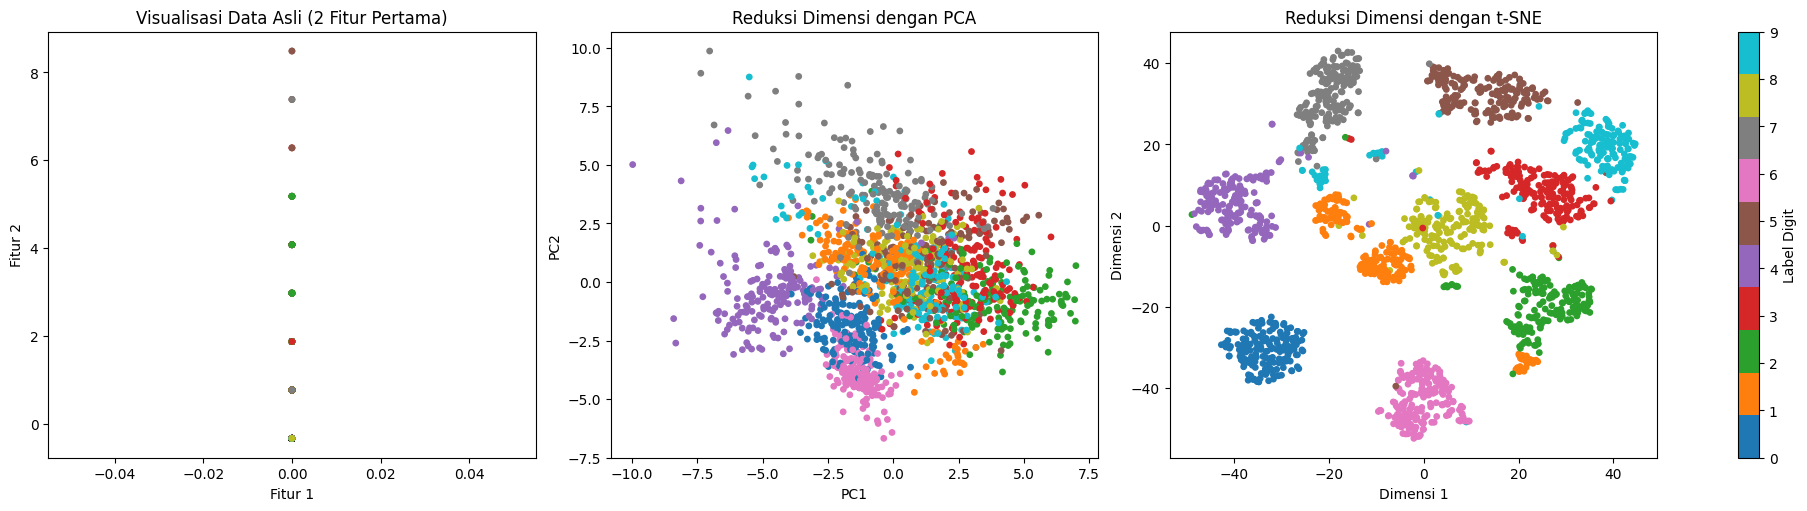

In [80]:
# Plot Semua
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Data Asli (2 fitur utama)
sc1 = axes[0].scatter(X_scaled[:, 0], X_original[:, 1], c=digits.target, cmap='tab10', s=15)
axes[0].set_title('Visualisasi Data Asli (2 Fitur Pertama)')
axes[0].set_xlabel("Fitur 1")
axes[0].set_ylabel('Fitur 2')

# PCA
sc2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap='tab10', s=15)
axes[1].set_title('Reduksi Dimensi dengan PCA')
axes[1].set_xlabel('PC1') 
axes[1].set_ylabel('PC2')

# t-SNE
sc3 = axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, cmap='tab10', s=15)
axes[2].set_title('Reduksi Dimensi dengan t-SNE')
axes[2].set_xlabel('Dimensi 1')
axes[2].set_ylabel('Dimensi 2')

# Color bar
plt.colorbar(sc3, ax=axes, orientation='vertical' ,label='Label Digit')
plt.show()